1) Рассматриваем задержи рейсов в каждом из 3 аэропортов в зависимости от дня недели.

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
data = pd.read_csv(url, sep = ',')
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
weather = pd.read_csv(url2, sep = ',')

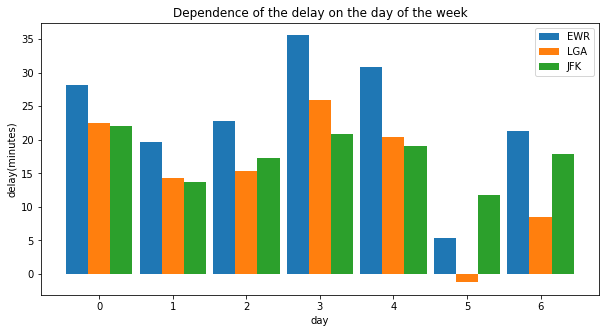

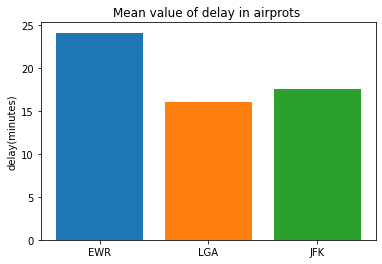

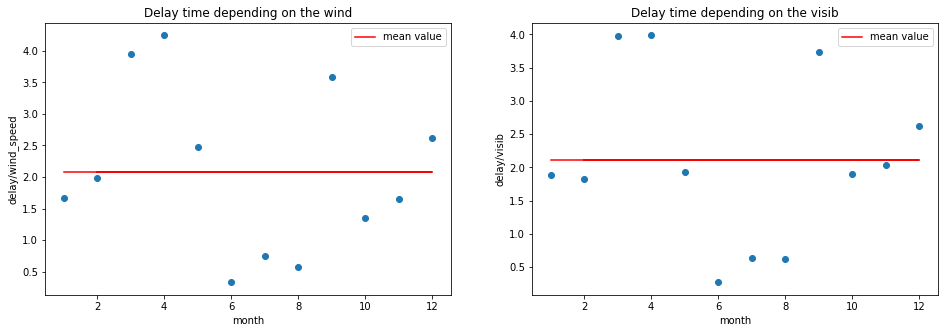

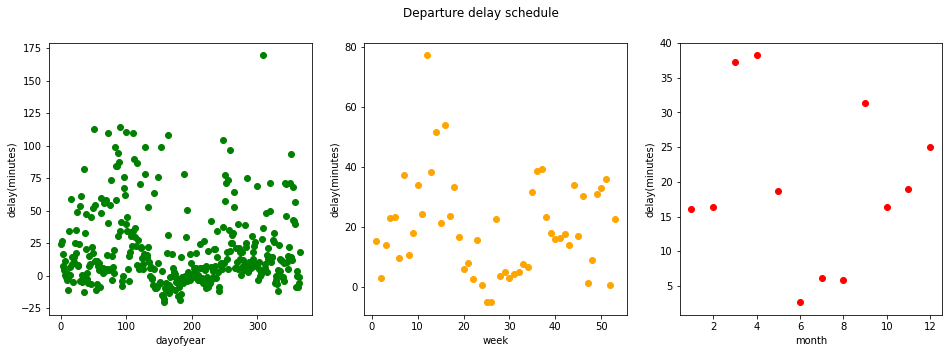

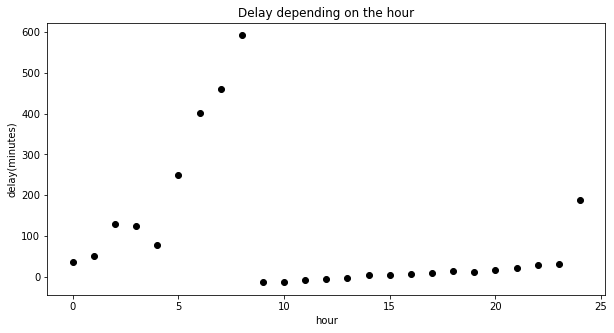

In [166]:
data['delay'] = data['arr_delay'] + data['dep_delay']

data['weekday'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data['weekday'] = data['weekday'].apply(lambda x: x.weekday())

data['time'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data['time'] = data['time'].apply(lambda x: x.dayofyear)
data['dayofyear'] = data['time']
data['time'] = (data['time']-1)*24 + data['hour']
data['week'] = data['dayofyear']//7 + 1;


weather['time'] = pd.to_datetime(weather[['year', 'month', 'day', 'hour']])
weather['time'] = weather['time'].apply(lambda x: x.dayofyear)
weather['dayofyear'] = weather['time']
weather['time'] = (weather['time']-1)*24 + weather['hour']


plt.figure(figsize=(10,5))
plt.title('Dependence of the delay on the day of the week')

plt.bar(np.array([i for i in range(7)])-0.3, np.array(data[data['origin']=='EWR'].groupby('weekday')['delay'].mean()), width = 0.3, label='EWR')
plt.bar(np.array([i for i in range(7)]), np.array(data[data['origin']=='LGA'].groupby('weekday')['delay'].mean()), width = 0.3, label='LGA')
plt.bar(np.array([i for i in range(7)])+0.3, np.array(data[data['origin']=='JFK'].groupby('weekday')['delay'].mean()), width = 0.3, label='JFK')
plt.legend()

plt.xlabel('day')
plt.ylabel('delay(minutes)')

plt.show()


plt.title('Mean value of delay in airprots ')

plt.bar('EWR', np.array(data[data['origin']=='EWR'].groupby('origin')['delay'].mean()), label='EWR')
plt.bar('LGA', np.array(data[data['origin']=='LGA'].groupby('origin')['delay'].mean()), label='LGA')
plt.bar('JFK', np.array(data[data['origin']=='JFK'].groupby('origin')['delay'].mean()), label='JFK')

plt.ylabel('delay(minutes)')

plt.show()


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Delay time depending on the wind')
plt.scatter(np.array((data['month'].dropna()).unique()), np.array((data.groupby('month')['delay'].mean()).dropna())/np.array((weather.groupby('month')['wind_speed'].mean()).dropna()))
plt.plot(np.array((data['month'].dropna()).unique()), np.full(12, (data.groupby('year')['delay'].mean()).dropna())/np.array((weather.groupby('year')['wind_speed'].mean()).dropna()), c='red', label = 'mean value')
plt.xlabel('month')
plt.ylabel('delay/wind_speed')
plt.legend()

plt.subplot(1,2,2)
plt.title('Delay time depending on the visib')
plt.scatter(np.array((data['month'].dropna()).unique()), np.array((data.groupby('month')['delay'].mean()).dropna())/np.array((weather.groupby('month')['visib'].mean()).dropna()))
plt.plot(np.array((data['month'].dropna()).unique()), np.full(12, (data.groupby('year')['delay'].mean()).dropna())/np.array((weather.groupby('year')['visib'].mean()).dropna()), c='red', label = 'mean value')
plt.xlabel('month')
plt.ylabel('delay/visib')
plt.legend()

plt.show()


plt.figure(figsize=(16,5))
plt.suptitle('Departure delay schedule')

plt.subplot(1,3,1)
plt.scatter(np.array((data['dayofyear'].dropna()).unique()), np.array(data.groupby('dayofyear')['delay'].mean().dropna()), c = 'green')
plt.xlabel('dayofyear')
plt.ylabel('delay(minutes)')

plt.subplot(1,3,2)
plt.scatter(np.array((data['week'].dropna()).unique()), np.array(data.groupby('week')['delay'].mean().dropna()), c = 'orange')
plt.xlabel('week')
plt.ylabel('delay(minutes)')

plt.subplot(1,3,3)
plt.scatter(np.array((data['month'].dropna()).unique()), np.array(data.groupby('month')['delay'].mean().dropna()), c = 'red')
plt.xlabel('month')
plt.ylabel('delay(minutes)')

plt.show()


plt.figure(figsize=(10,5))
plt.title('Delay depending on the hour')
plt.scatter(np.array((data['hour'].dropna()).unique()), np.array((data.groupby('hour')['delay'].mean().dropna()).sort_index()), c = 'black')
plt.xlabel('hour')
plt.ylabel('delay(minutes)')

plt.show()

Выводы:
1) В течении недели, за исключением субботы, наблюдаются значительные задержки рейсов, возможно стоит увеличить численность персонала в эти дни.
2) В EWR задержки в среднем больше чем в других аэропортах, возможно стоит перераспределить часть рейсов на другие аэропорты и уменьшить интервалы между вылетами.
3) Ветер не оказывает значительного влияния на задержки рейсов
4) Уровень видимости не оказывает значительного влияния на задержки рейсов
5) В летние месяцы задержки сокращаются, возможно в другие месяцы следует повысить количество персонала в аэропортах
6) В первые 8 часов каждого дня задержки возрастают. В этот период стоит сократить время между вылетами и увеличить количество персонала. 